# Clasificación No Convecional
## Práctica 0
Carlos Checa Moreno

# Ejercicio 4
Contenido del dataset: Conjunto de datos de vino rojo para determinar su calidad. Hay 12 atributos y el último atributo es la calidad, que se tomará como etiqueta. La calidad varía de 0 a 10, pero se va a convertir a un problema con dos clases, calidad pobre, de 0 a 5, y buena, de 6 a 10.
El ejercicio consiste obtener un modelo de clasificación para clasificar las imágenes de árbol enfermos (clase positiva) de imágenes de otro tipo de cubierta (clase negativa). Los atributos son: 1 fixed acidity, 2 volatile acidity, 3 citric acid, 4 residual sugar, 5 chlorides, 6 free sulfur dioxide, 7 total sulfur dioxide, 8 density, 9 pH, 10 sulphates, 11 alcohol, 12 quality (score between 0 and 10)
*   URL: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
*   URL Dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

**Tomando como base el ejemplo 9 de los suministrados en clase**, implementar un clasificador basado en voting, que use los siguientes clasificadores: Random Forest, Regresión Logística y SVC. Ha de contener los siguientes apartados.
*   Uso de StandardScaler en el preprocesamiento.
*   Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify ya que las clases estuviesen desbalanceadas.
*   Aplicar la técnica de voting.
*   Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Aplicar posteriormente los clasificadores cada uno por separado y obtener las mismas medidas para comparar con el clasificador basado en voting.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.

In [1]:
import pandas as pd

In [2]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2025-01-21 20:05:06--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-red.csv’

     0K .......... .......... .......... .......... ..........  533K
    50K .......... .......... .......... ..                     669K=0.1s

2025-01-21 20:05:07 (579 KB/s) - ‘winequality-red.csv’ saved [84199]



In [3]:
wine = pd.read_csv("/content/winequality-red.csv", sep=';')
#El segundo parámetro es para indicar que los separadotes son puntos y comas, ya que por defecto son comas.
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Guardamos las etiquetas en y
y = wine["quality"]
#Definimos dos etiquetas, calidad > 5 (clase positiva), calidad <= 5 (clase negativa)
y = (y >5)
#Eliminamos las etiquetas del data set
X = wine.drop("quality", axis = 1)

In [5]:
#Ahora se escalan los datos
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
#Vamos a ver las 3 primeras instancias del dataset
X[:3]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711]])

In [ ]:
y[:3]

0    False
1    False
2    False
Name: quality, dtype: bool

In [7]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Dividir en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Crear clasificadores individuales
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
logreg_clf = LogisticRegression(random_state=42)
svc_clf = SVC(random_state=42, probability=True)

# Clasificador basado en Voting
voting_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('logreg', logreg_clf), ('svc', svc_clf)],
    voting='soft'
)

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Entrenamiento del modelo de Voting
voting_clf.fit(X_train, y_train)

# Predicciones con Voting
y_pred_voting = voting_clf.predict(X_test)

# Métricas para Voting
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)

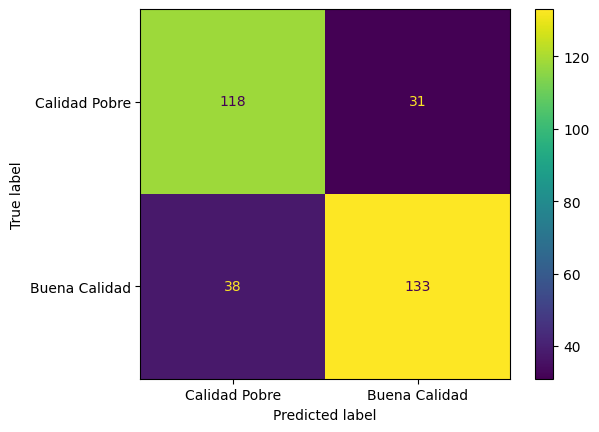

In [11]:
# Mostrar matriz de confusión para Voting
cm_voting = confusion_matrix(y_test, y_pred_voting)
ConfusionMatrixDisplay(confusion_matrix=cm_voting, display_labels=["Calidad Pobre", "Buena Calidad"]).plot()

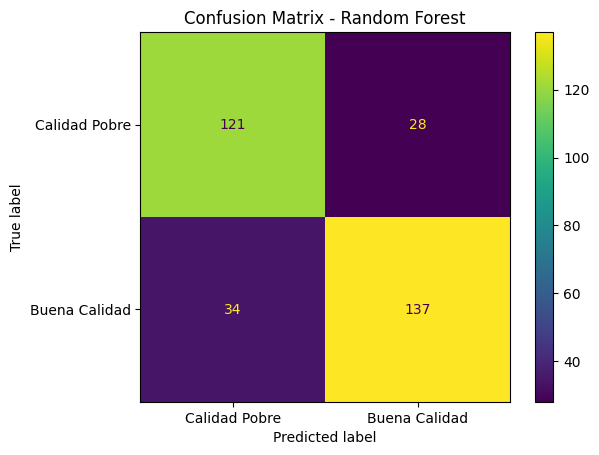

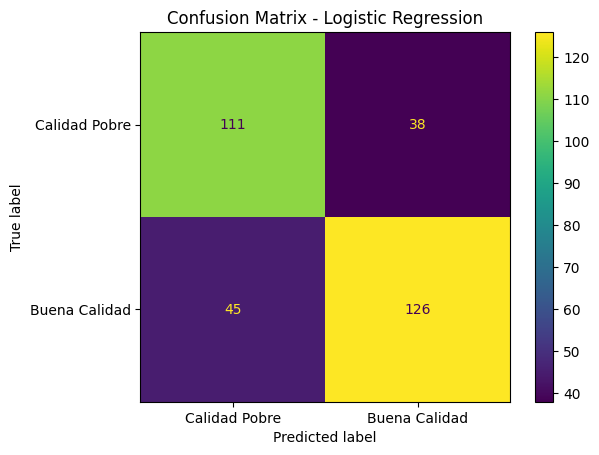

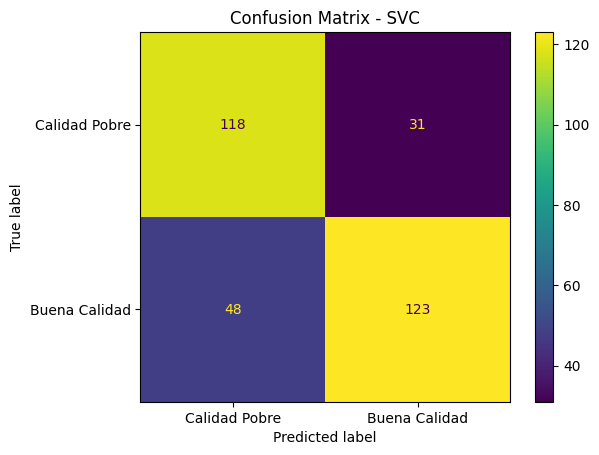

In [18]:
# Evaluación de clasificadores individuales
def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm_voting = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_voting, display_labels=["Calidad Pobre", "Buena Calidad"])
    disp.plot()
    disp.ax_.set_title(f"Confusion Matrix - {name}")
    return accuracy, precision, recall, f1, y_pred

# Random Forest
accuracy_rf, precision_rf, recall_rf, f1_rf, y_pred_rf = evaluate_model(rf_clf, X_train, X_test, y_train, y_test, "Random Forest")

# Logistic Regression
accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, y_pred_logreg = evaluate_model(logreg_clf, X_train, X_test, y_train, y_test, "Logistic Regression")

# SVC
accuracy_svc, precision_svc, recall_svc, f1_svc, y_pred_svc = evaluate_model(svc_clf, X_train, X_test, y_train, y_test, "SVC")

In [14]:
# Resultados
print("Resultados del Voting Classifier:")
print(f"Accuracy: {accuracy_voting}")
print(f"Precision: {precision_voting}")
print(f"Recall: {recall_voting}")
print(f"F1 Score: {f1_voting}")

print("\nResultados de Random Forest:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

print("\nResultados de Logistic Regression:")
print(f"Accuracy: {accuracy_logreg}")
print(f"Precision: {precision_logreg}")
print(f"Recall: {recall_logreg}")
print(f"F1 Score: {f1_logreg}")

print("\nResultados de SVC:")
print(f"Accuracy: {accuracy_svc}")
print(f"Precision: {precision_svc}")
print(f"Recall: {recall_svc}")
print(f"F1 Score: {f1_svc}")


Resultados del Voting Classifier:
Accuracy: 0.784375
Precision: 0.8109756097560976
Recall: 0.7777777777777778
F1 Score: 0.7940298507462686

Resultados de Random Forest:
Accuracy: 0.80625
Precision: 0.8303030303030303
Recall: 0.8011695906432749
F1 Score: 0.8154761904761905

Resultados de Logistic Regression:
Accuracy: 0.740625
Precision: 0.7682926829268293
Recall: 0.7368421052631579
F1 Score: 0.7522388059701492

Resultados de SVC:
Accuracy: 0.753125
Precision: 0.7987012987012987
Recall: 0.7192982456140351
F1 Score: 0.7569230769230769


## Párrafo explicativo


Para finalizar esta práctica, como ejercicio 4 primero se han dividido los datos escalados en conjuntos de entrenamiento y test.

Después se ha aplicado un clasificador basado en Voting que combina los modelos Random Forest, Regresión Logística y SVC.También se han entrenado y evaluado los clasificadores individuales de forma independiente para comparar sus resultados con los obtenidos por el Voting. Así podemos observar como el Voting Classifier combina puntos fuertes de todos los clasificadores para lograr un mejor desempeño global.

Finalmente, al igual que se realizó en los demás ejercicios, podemos obtener las siguientes conclusiones de los resultados obtenidos:
*   El Voting Classifier demuestra ser un modelo balanceado presentando resultados mejores que los peores clasificadores probados. Es decir, no presenta tan buenos resultados como el mejor de sus clasificadores (RandomForest), pero sí mejora los peores.

*   En comparación, el Random Forest sobresale en todas las métricas consolidándose como el mejor modelo entre los evaluados. Por otro lado, Logistic Regression muestra un rendimiento algo más limitado con un accuracy de 0.741, lo que podría deberse a su enfoque más lineal en un problema potencialmente no lineal.

*   Por último, el modelo SVC, con un accuracy de 0.753 y un F1 Score de 0.757, presenta resultados intermedios. Aunque logra una precisión relativamente alta de 0.799, su recall más bajo (0.719) sugiere que no captura tantas instancias positivas como el Random Forest o el Voting Classifier.